In [1]:
# Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Data
df = pd.read_csv("data/data.csv")

In [3]:
# Data head
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Train-test split
X = df.drop(columns=["Churn"])
y = df["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 1) Continous Features

In [5]:
# Numeric variable names
continuous_features = [var for var in df.columns if df[var].dtype != "O" and df[var].nunique() > 20]

In [6]:
# Stats
df[continuous_features].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


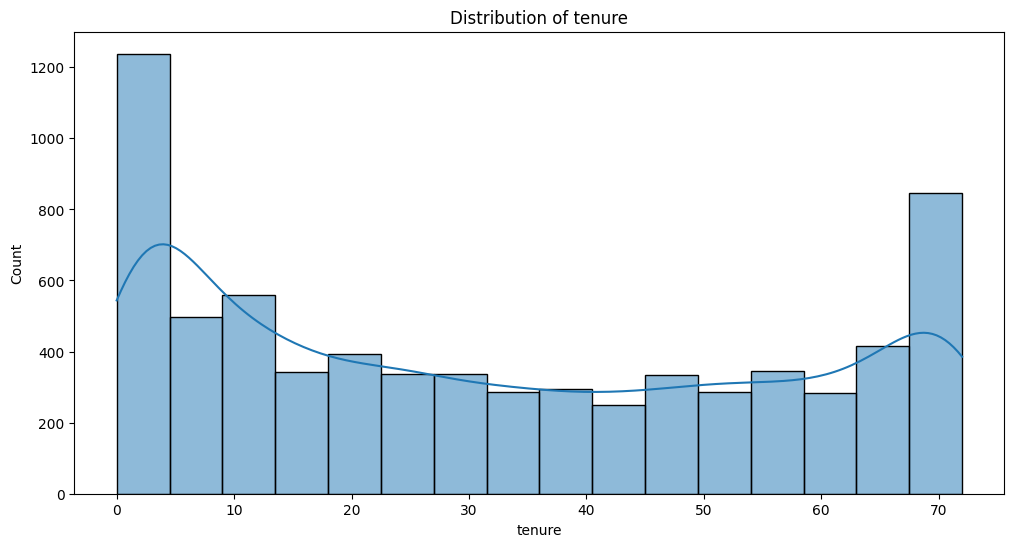

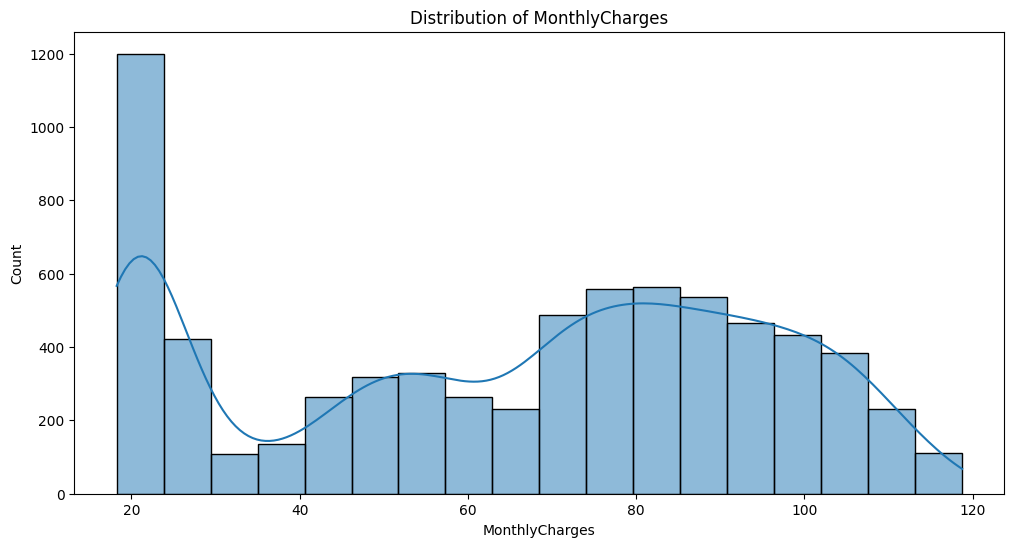

In [7]:
# Distributions
for col in continuous_features:
    plt.figure(figsize=(12, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [10]:
# Missing Values
df[continuous_features].isnull().sum()

tenure            0
MonthlyCharges    0
dtype: int64

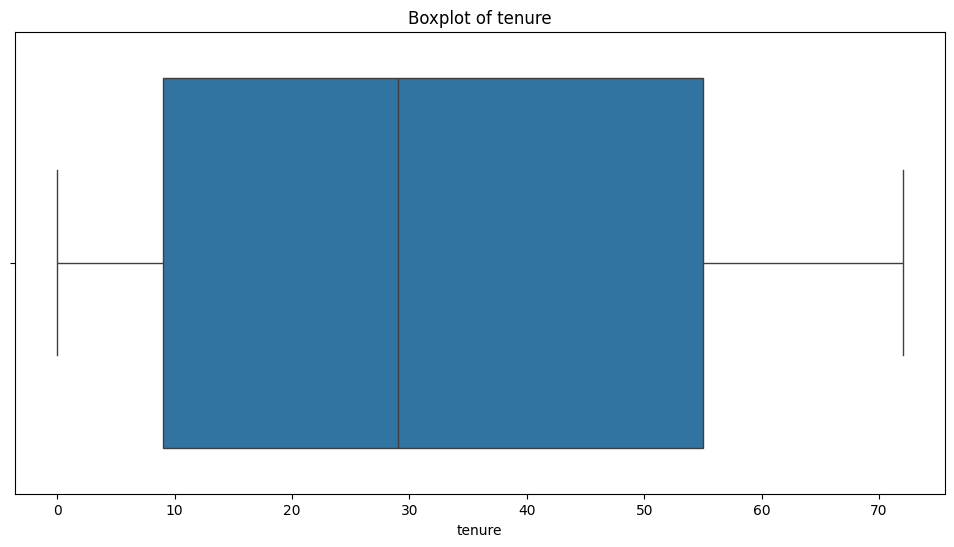

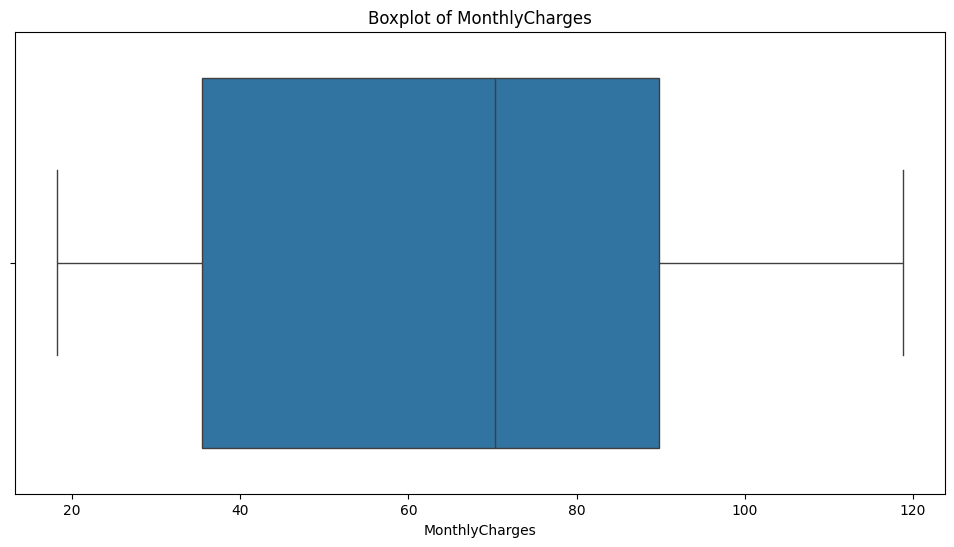

In [11]:
# Outliers
for col in continuous_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

- No need for missing value imputation
- No need for outlier treatment
- Need for scaling (StandardScaler or MinMaxScaler)

# 2) Discrete Features

In [14]:
# Discrete feature names
discrete_features = [var for var in df.columns if df[var].dtype != "O" and df[var].nunique() <= 20]
discrete_features

['SeniorCitizen']

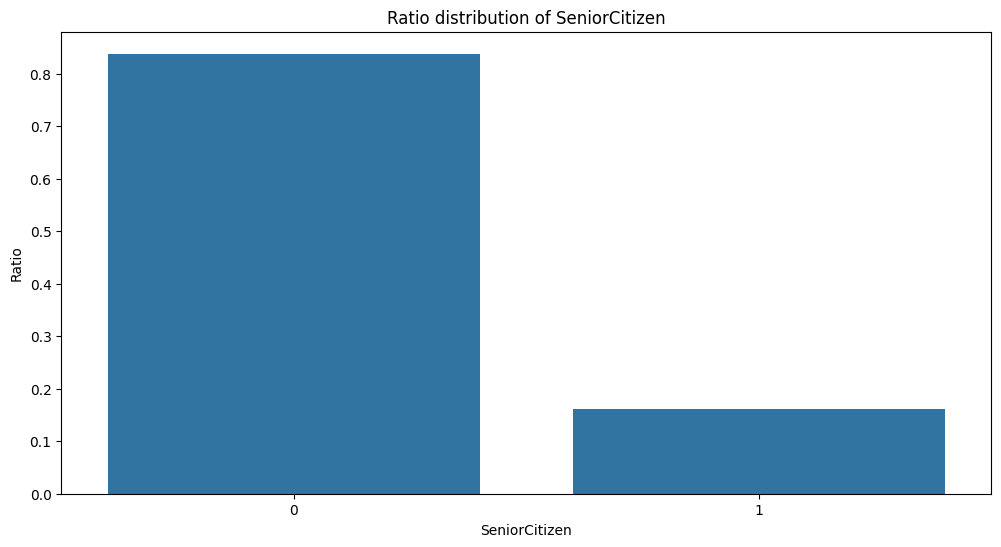

In [ ]:
# Ratio distributions
for col in discrete_features:
    plt.figure(figsize=(12, 6))
    ratios = df[col].value_counts(normalize=True)
    sns.barplot(x=ratios.index, y=ratios.values)
    plt.ylabel('Ratio')
    plt.title(f'Ratio distribution of {col}')
    plt.show()


- No need for missing value imputation

# 3) Categorical Features

In [20]:
# Categorical feature names
categorical_features = [var for var in df.columns if df[var].dtype == "O"]
categorical_features

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [21]:
# Cardinalities of categorical features
for col in categorical_features:
    print(f'{col}: {df[col].nunique()} unique values')

customerID: 7043 unique values
gender: 2 unique values
Partner: 2 unique values
Dependents: 2 unique values
PhoneService: 2 unique values
MultipleLines: 3 unique values
InternetService: 3 unique values
OnlineSecurity: 3 unique values
OnlineBackup: 3 unique values
DeviceProtection: 3 unique values
TechSupport: 3 unique values
StreamingTV: 3 unique values
StreamingMovies: 3 unique values
Contract: 3 unique values
PaperlessBilling: 2 unique values
PaymentMethod: 4 unique values
TotalCharges: 6531 unique values
Churn: 2 unique values


In [23]:
# TotalCharges issue
df['TotalCharges'].value_counts()

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

In [24]:
# Replace blank values with NaN and convert to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

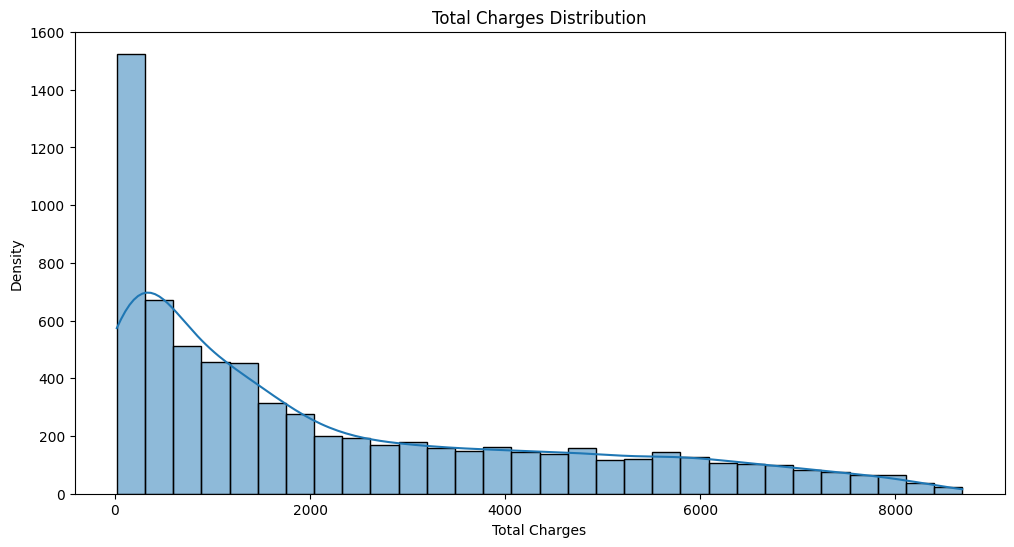

In [28]:
# Total charges distribution plot
plt.figure(figsize=(12, 6))
sns.histplot(df['TotalCharges'], bins=30, kde=True)
plt.title('Total Charges Distribution')
plt.xlabel('Total Charges')
plt.ylabel('Density')
plt.show()

Missing values in TotalCharges column can be imputed with the median of the column.

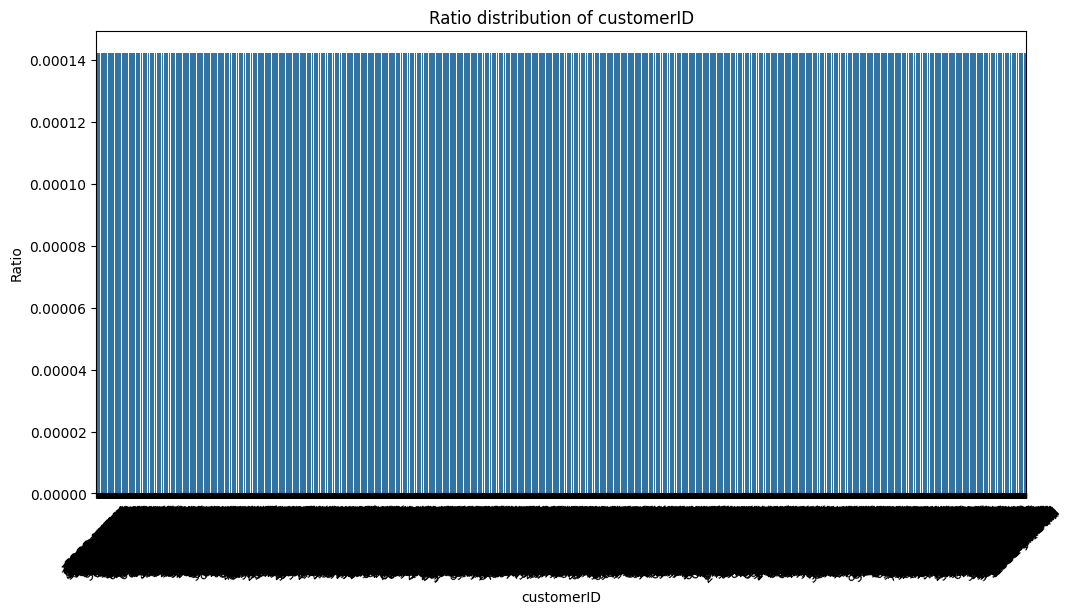

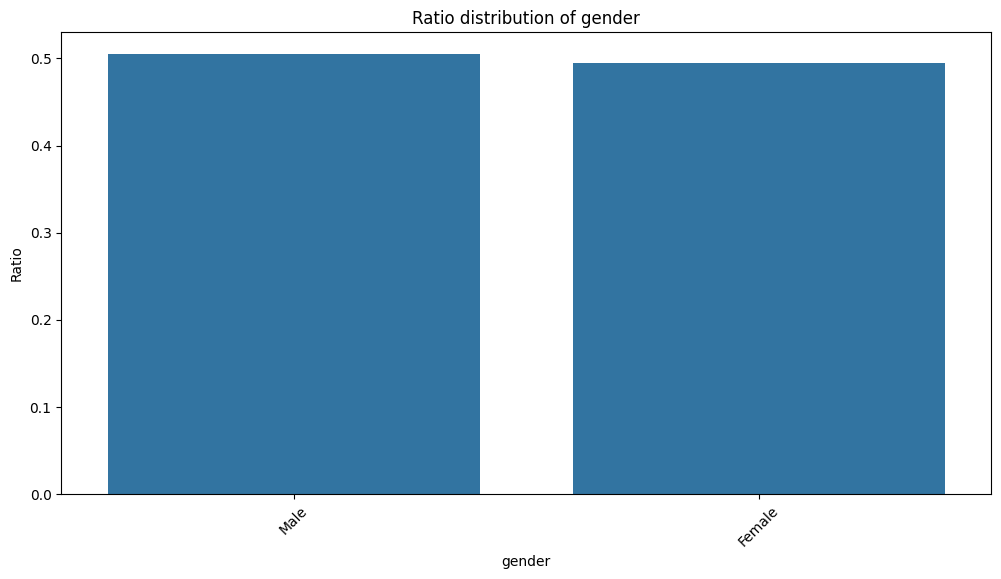

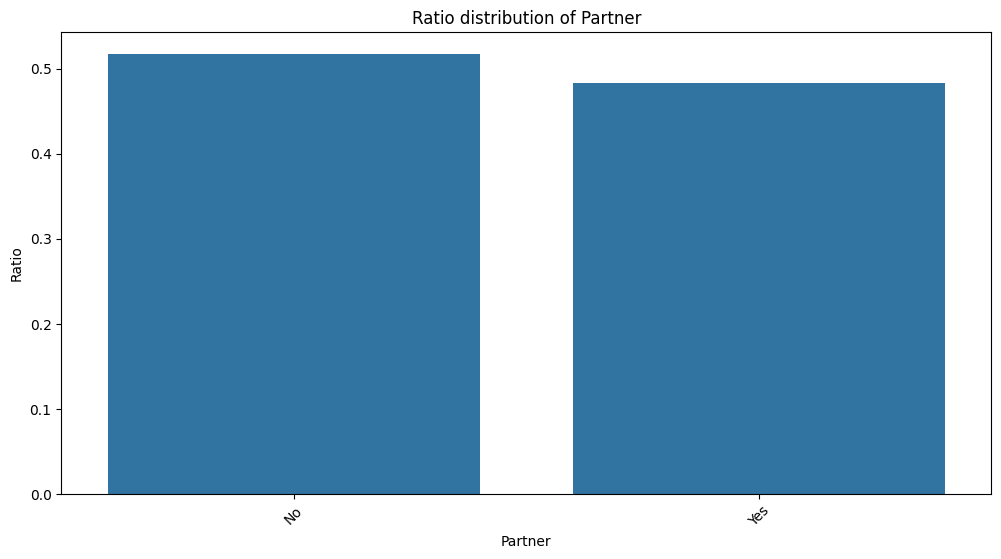

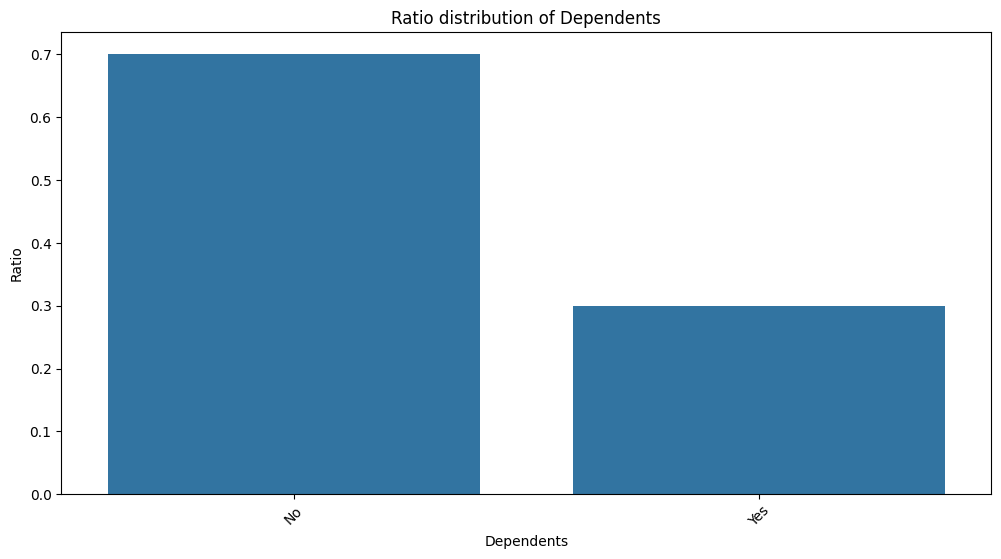

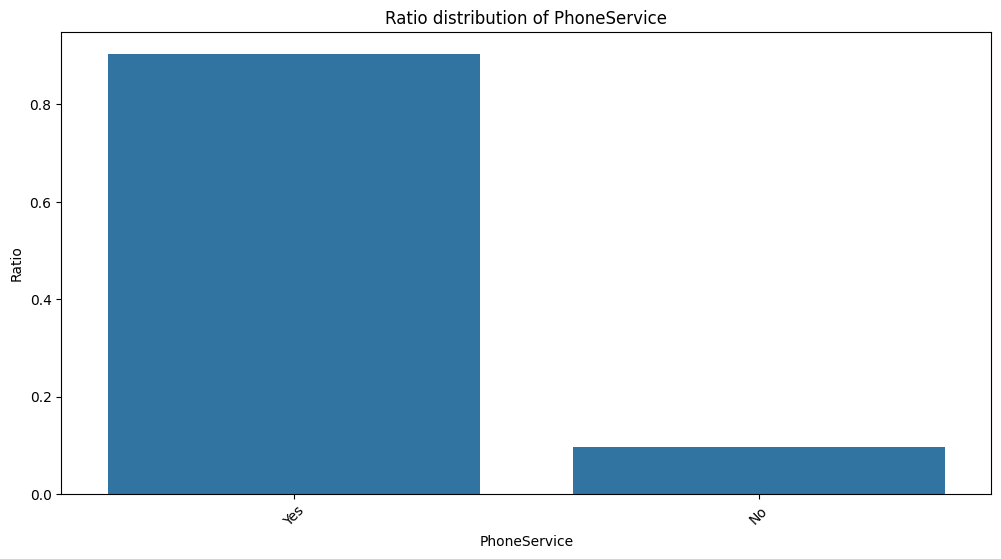

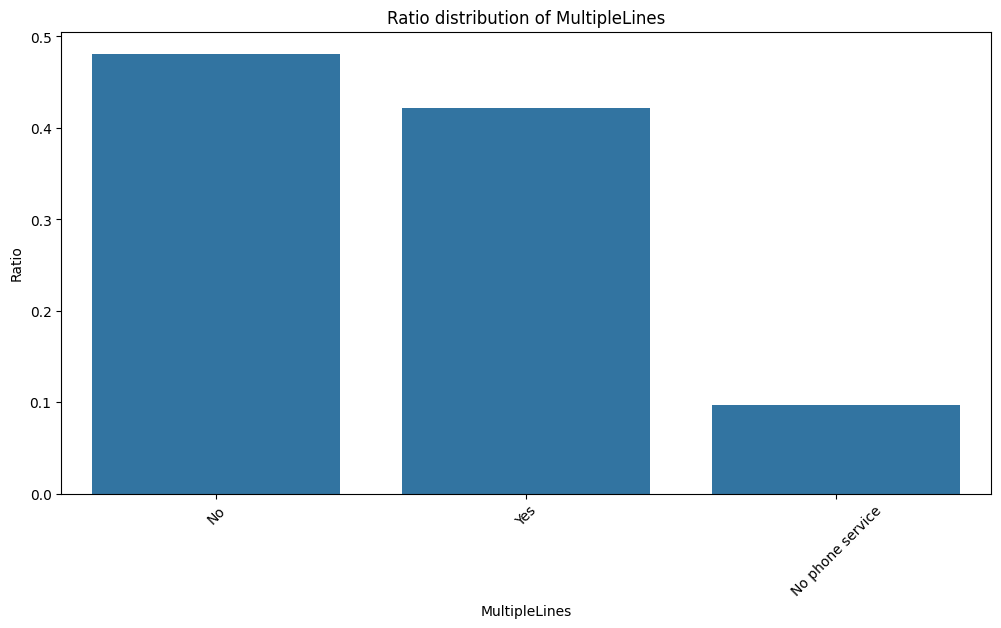

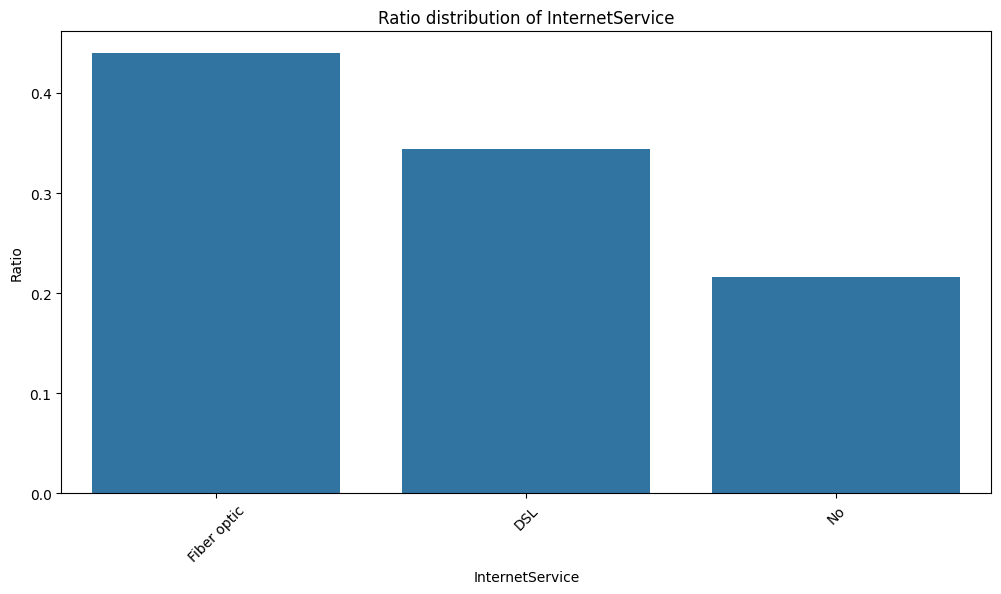

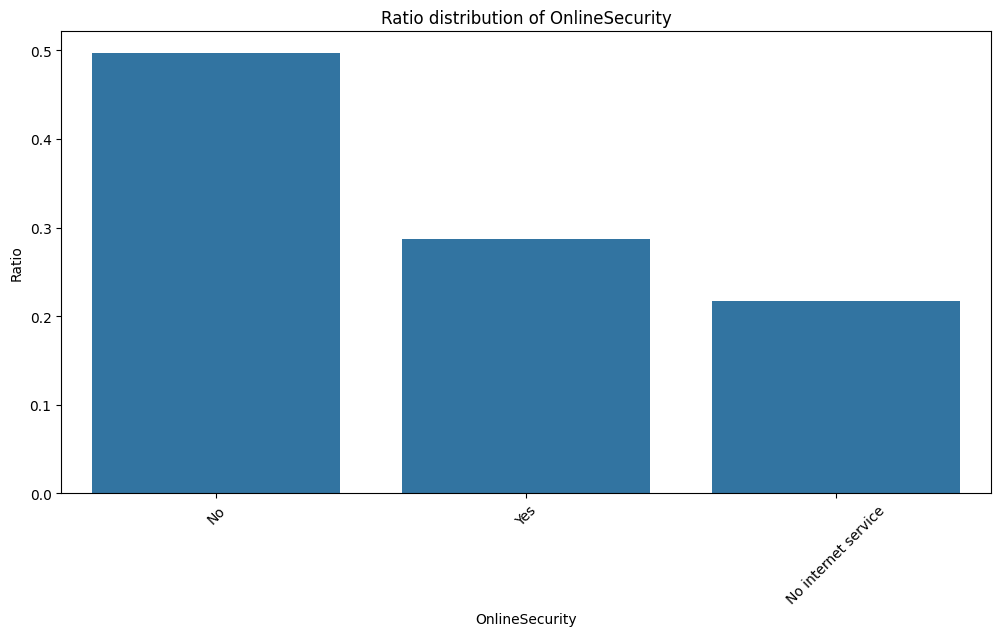

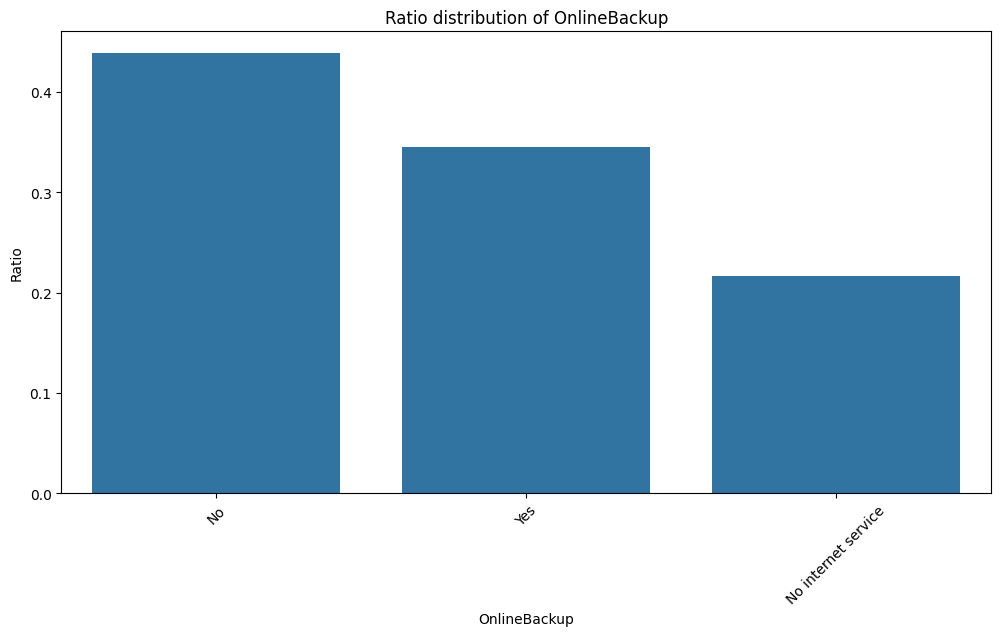

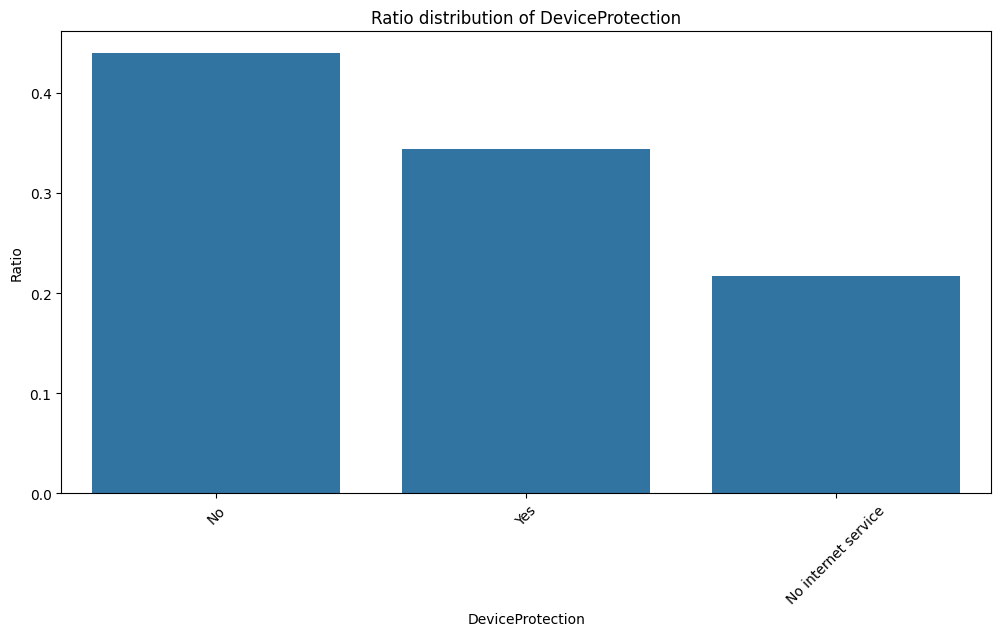

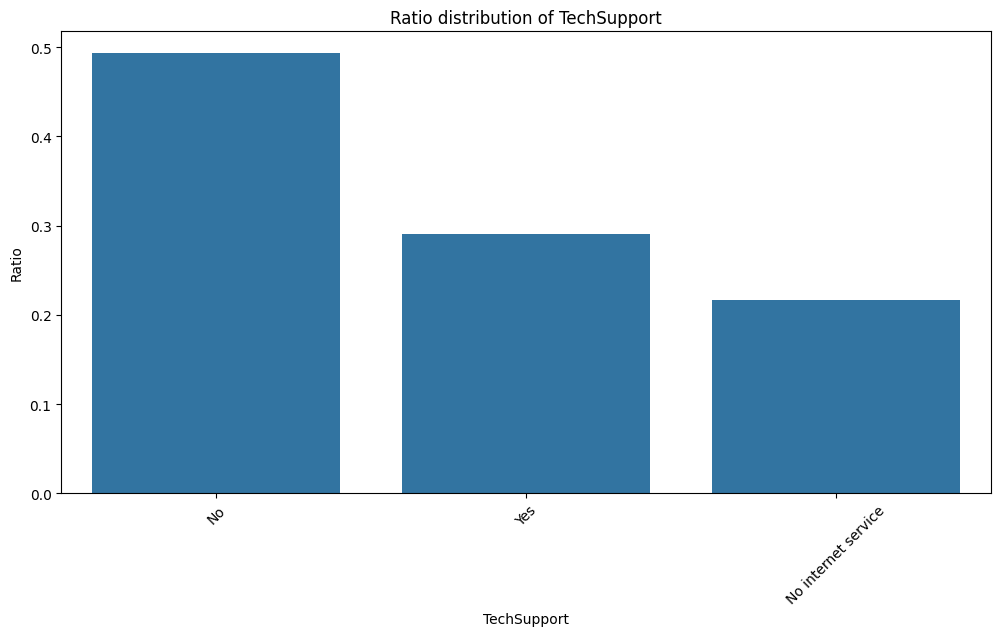

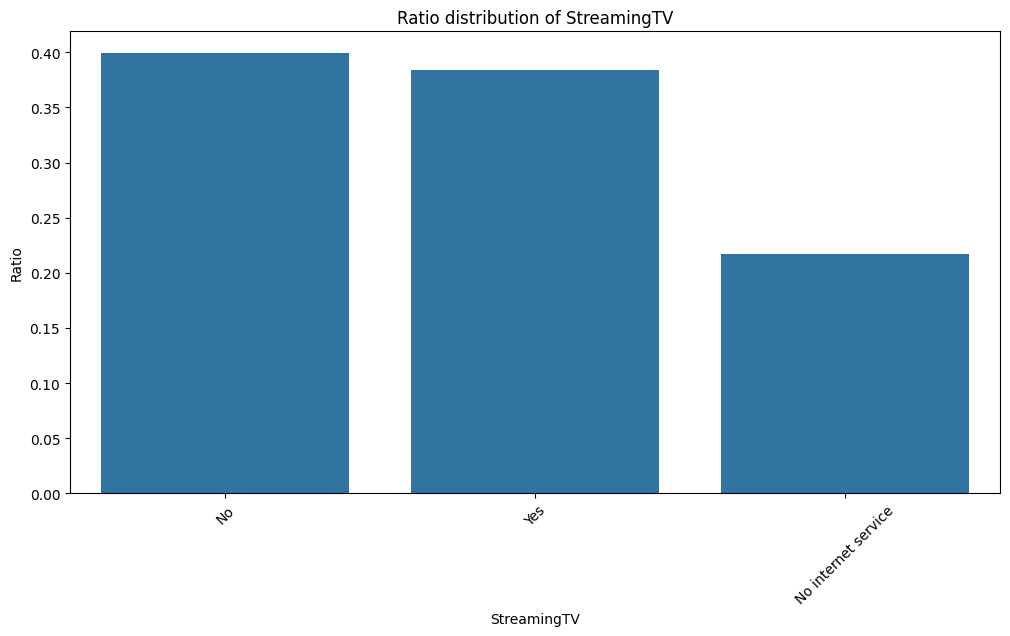

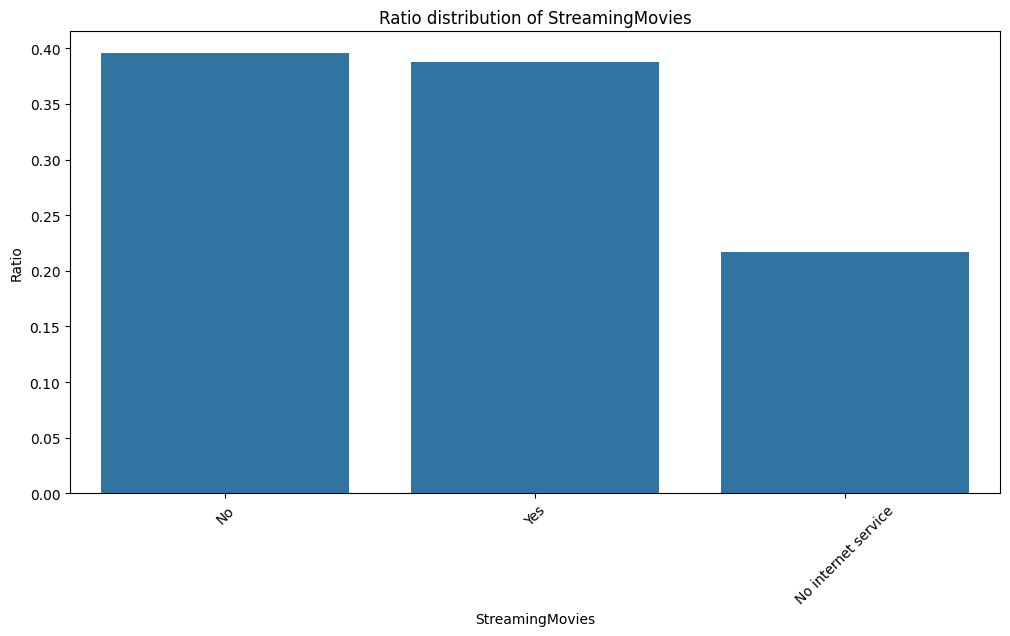

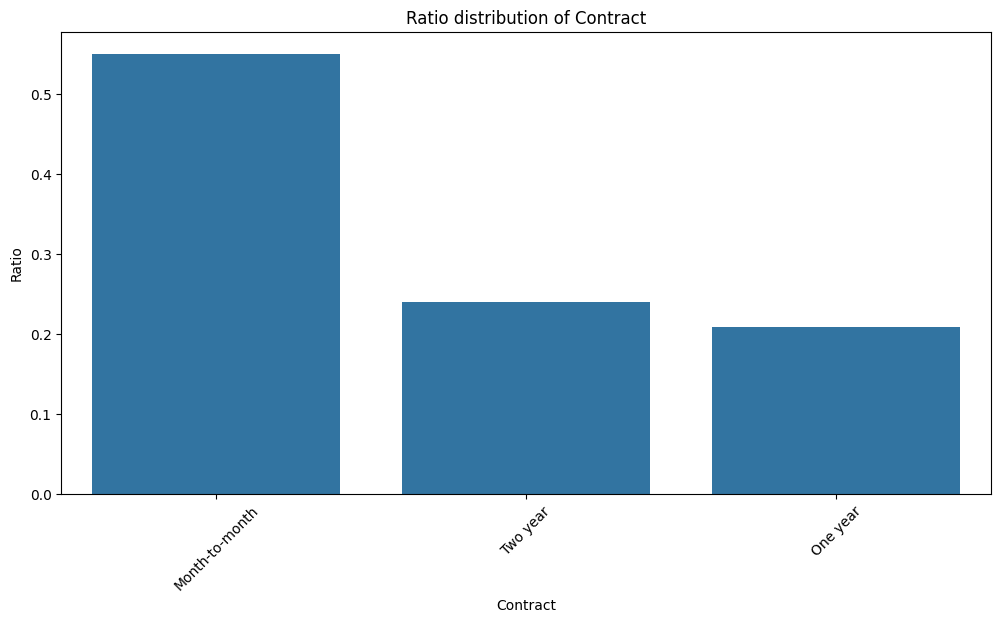

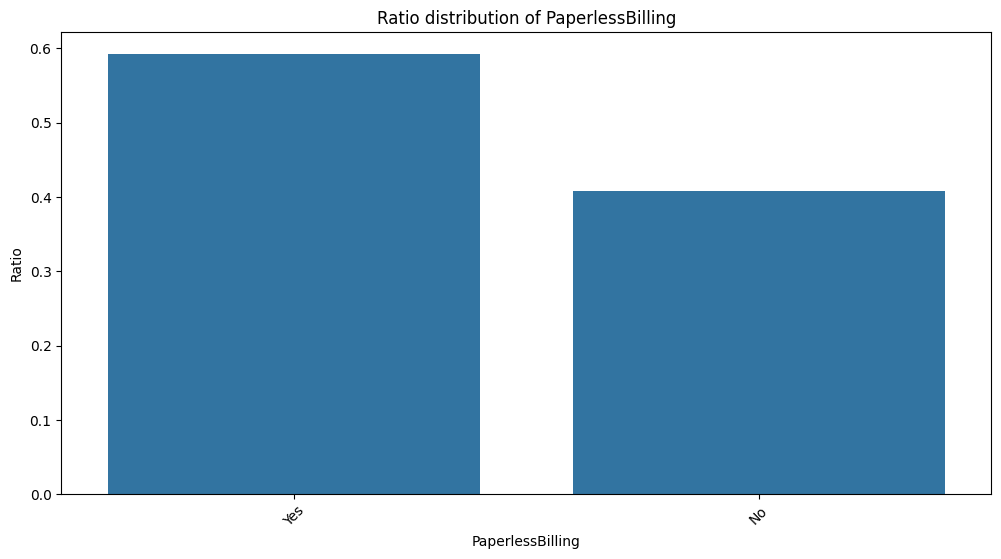

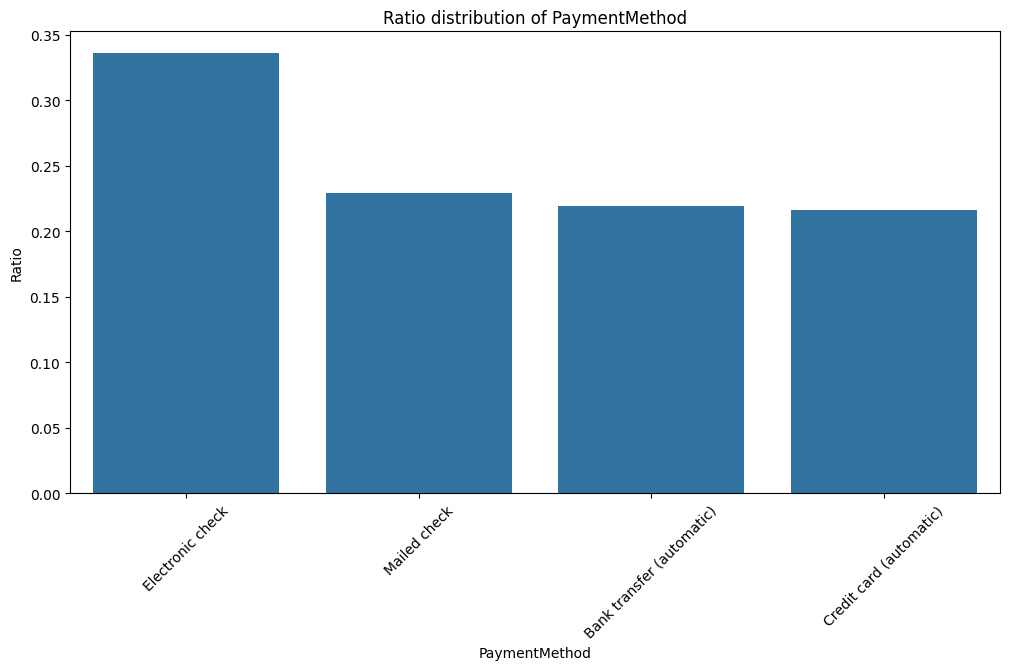

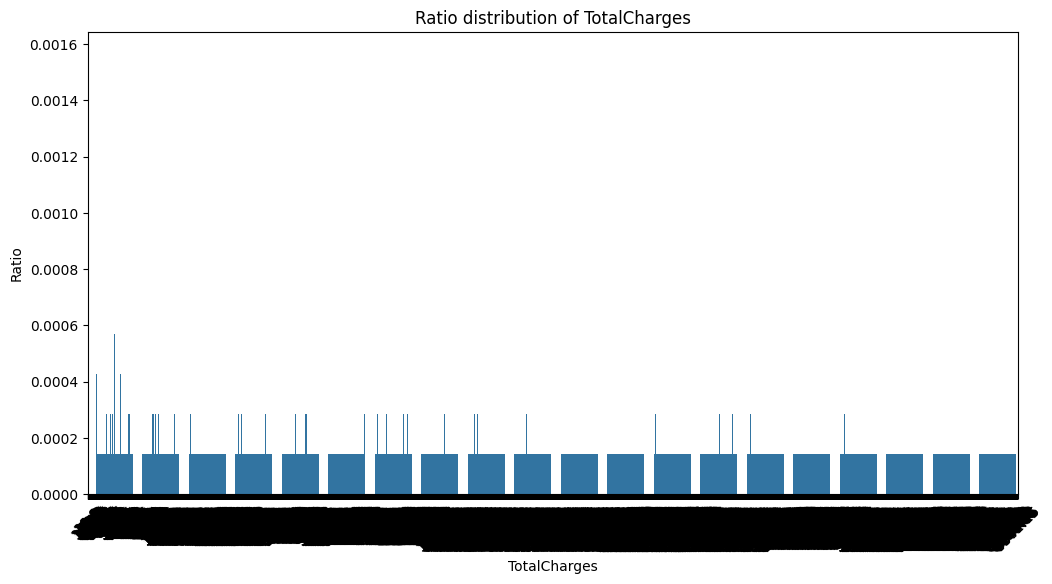

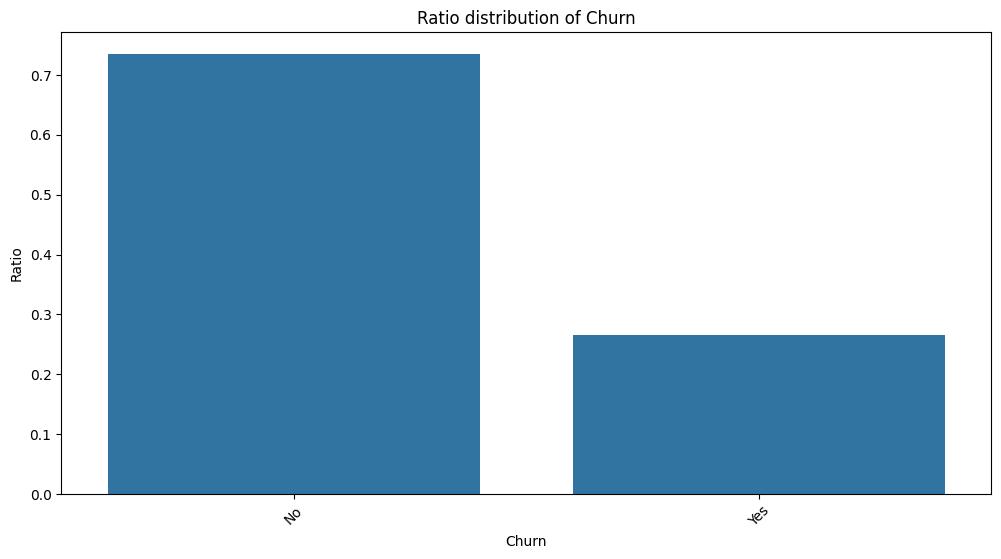

In [29]:
# Rare label analysis of categorical features
for col in categorical_features:
    plt.figure(figsize=(12, 6))
    ratios = df[col].value_counts(normalize=True)
    sns.barplot(x=ratios.index, y=ratios.values)
    plt.ylabel('Ratio')
    plt.title(f'Ratio distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

In [32]:
# Exporting cleaned data
df.to_csv("data/cleaned_data.csv", index=False)

# 4) Feature Engineering Steps 

1. Missing value imputation for TotalCharges column
2. Encoding categorical variables (One-Hot Encoding or Label Encoding)
3. Feature scaling for continuous variables (StandardScaler or MinMaxScaler)